In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from scipy import stats
import glob
from functools import reduce
from clawpack.geoclaw import topotools as topo

In [2]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from scipy import stats

In [10]:
def custom_div_cmap(numcolors=15, name='custom_div_cmap'):
    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =colors,
                                             N=numcolors)
    return cmap
colors = ['royalblue', 'royalblue', 'royalblue', 'CornflowerBlue','CornflowerBlue','CornflowerBlue','lightskyblue','lightskyblue','g', 'g', 'g']
cmap1 = custom_div_cmap(11, colors)
colors = ['royalblue', 'royalblue', 'royalblue', 'royalblue','CornflowerBlue','CornflowerBlue','CornflowerBlue','lightskyblue','lightskyblue','g', 'g', 'g','g','red']
cmap2 = custom_div_cmap(11, colors)


In [3]:
dirs = glob.glob('/Users/raelynnwonnacott/Desktop/res7/5*/')
samples = []
model_params = []
model_output = []
bayes_data = []
debug = []
data = (['samples', 'model_params', 'model_output', 'bayes_data'], [samples, model_params, model_output, bayes_data])

for dir_ in dirs:
    for kind,lst in zip(*data):
        k = 1
        df = pd.read_csv(dir_+kind+'.csv', index_col=0).iloc[k:].reset_index(drop=True)
        lst.append(df)
        
        

In [4]:
rundir = '/Users/raelynnwonnacott/Desktop/res7/'

chains_samples = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_samples[file] = pd.read_csv(os.path.join(rundir, file, "samples.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no samples data")
            chains_samples[file] = None

            
chains_params = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_params[file] = pd.read_csv(os.path.join(rundir, file, "model_params.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no params data")
            chains_params[file] = None
            
            
chains_output = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_output[file] = pd.read_csv(os.path.join(rundir, file, "model_output.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no output data")
            chains_output[file] = None
            
            
chains_bayes_data = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_bayes_data[file] = pd.read_csv(os.path.join(rundir, file, "bayes_data.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no bayes_data data")
            chains_bayes_data[file] = None
            
            
chains_debug = {}
for file in os.listdir(rundir):
    if file[0] != '.' and file[-3:-1] == '_m':
        try:
            chains_debug[file] = pd.read_csv(os.path.join(rundir, file, "debug.csv"),
                                      index_col=0).reset_index(drop=True)
        except FileNotFoundError:
            print(f"SLURM ID {file[:-3]} has no debug data")
            chains_debug[file] = None

In [5]:
all_samples=pd.concat(samples,ignore_index=True)
all_model_params=pd.concat(model_params,ignore_index=True)
all_model_output=pd.concat(model_output,ignore_index=True)
all_bayes_data = pd.concat(bayes_data,ignore_index=True)

In [6]:
len(all_samples)

31830

## Model Output Histograms

<ipython-input-25-266da7f655f4>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,1)


Text(0.5, 1.0, 'Buru height')

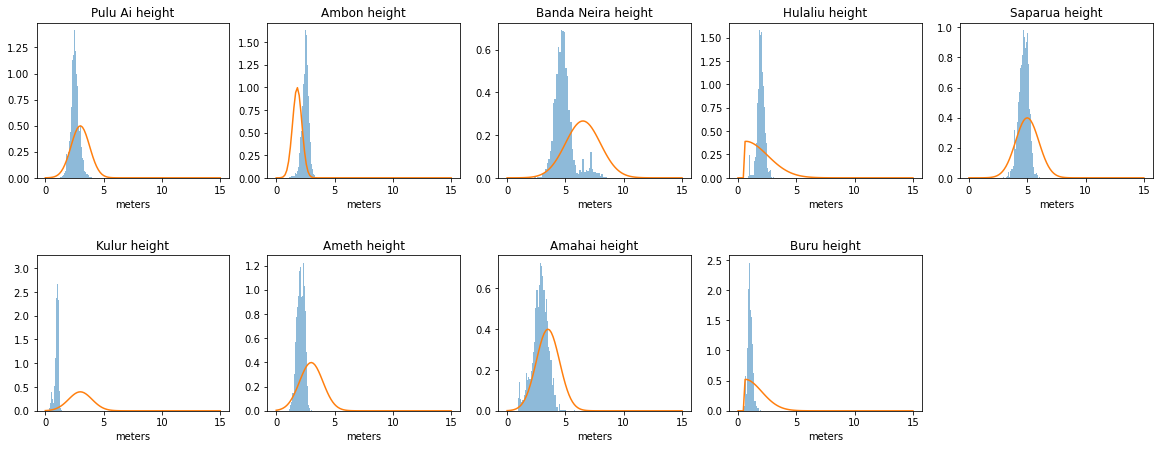

In [25]:
%matplotlib inline
plt.subplots(figsize=(20,20))
plt.subplots_adjust(hspace = .5)
plt.subplot(5,5,1)
domain = np.linspace(0,15,100)

plt.hist(all_model_output['Pulu Ai height'],bins=50,alpha=0.5,density=True,label='Pulu Ai height');
Pulu_height = stats.norm(loc=3,scale=0.8)
plt.plot(domain,Pulu_height.pdf(domain))
plt.title('Pulu Ai height')
plt.xlabel('meters')

plt.subplot(5,5,2)
plt.hist(all_model_output['Ambon height'],bins=50,alpha=0.5,density=True,label='Ambon height');
plt.title('Ambon height')
Ambon_height = stats.norm(loc=1.8,scale=0.4)
plt.plot(domain,Ambon_height.pdf(domain))
plt.xlabel('meters')

plt.subplot(5,5,3)
plt.hist(all_model_output['Banda Neira height'],bins=50,alpha=0.5,density=True,label='Banda Neira height');
plt.title('Banda Neira height')
Banda_height = stats.norm(loc=6.5,scale=1.5)
plt.plot(domain,Banda_height.pdf(domain))
plt.xlabel('meters')

plt.subplot(5,5,4)
plt.hist(all_model_output['Hulaliu height'],bins=50,alpha=0.5,density=True,label='Hulaliu height');
Hulaliu_height = stats.chi(df=1.01,loc=0.5,scale=2.0)
plt.plot(domain,Hulaliu_height.pdf(domain))
plt.title('Hulaliu height')
plt.xlabel('meters')

plt.subplot(5,5,5)
plt.hist(all_model_output['Saparua height'],bins=50,alpha=0.5,density=True,label='Saparua height');
plt.title('Saparua height')
Saparua_height = stats.norm(loc=5,scale=1)
plt.plot(domain,Saparua_height.pdf(domain))
plt.xlabel('meters')

plt.subplot(5,5,6)
plt.hist(all_model_output['Kulur height'],bins=50,alpha=0.5,density=True,label='Kulur height');
plt.title('Kulur height')
Kulur_height = stats.norm(loc=3,scale=1)
plt.plot(domain,Kulur_height.pdf(domain))
plt.xlabel('meters')

plt.subplot(5,5,7)
plt.hist(all_model_output['Ameth height'],bins=50,alpha=0.5,density=True,label='Ameth height');
plt.title('Ameth height')
Ameth_height = stats.norm(loc=3,scale=1)
plt.plot(domain,Ameth_height.pdf(domain))
plt.xlabel('meters')

plt.subplot(5,5,8)
plt.hist(all_model_output['Amahai height'],bins=50,alpha=0.5,density=True,label='Amahai height');
plt.title('Amahai height')
Amahai_height = stats.norm(loc=3.5,scale=1)
plt.plot(domain,Amahai_height.pdf(domain))
plt.xlabel('meters')

plt.subplot(5,5,9)

plt.hist(all_model_output['Buru height'],bins=50,alpha=0.5,density=True,label='Buru height');
Buru_height = stats.chi(df=1.01,loc=0.5,scale=1.5)
plt.plot(domain,Buru_height.pdf(domain))
plt.xlabel('meters')
plt.title('Buru height')

<ipython-input-26-d6076fc685d4>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


Text(0.5, 0, 'meters')

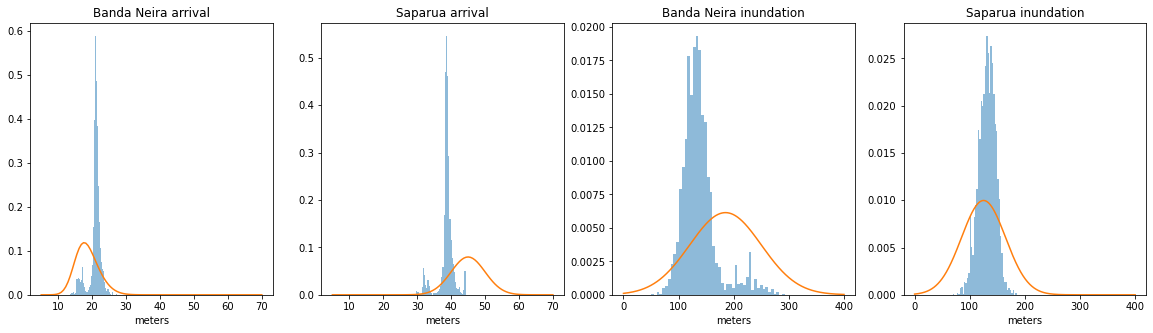

In [26]:
%matplotlib inline
plt.subplots(figsize=(20,5))
plt.subplot(1,4,1)
domain = np.linspace(5,70,100)

plt.hist(all_model_output['Banda Neira arrival'],bins=50,alpha=0.5,density=True,label='Banda Neira arrival');
plt.title('Banda Neira arrival')
Banda_arrival = stats.skewnorm(a=2,loc=15,scale=5)
plt.plot(domain,Banda_arrival.pdf(domain))
plt.xlabel('meters')

plt.subplot(1,4,2)
plt.hist(all_model_output['Saparua arrival'],bins=50,alpha=0.5,density=True,label='Saparua arrival');
Saparua_arrival = stats.norm(loc=45,scale=5)
plt.plot(domain,Saparua_arrival.pdf(domain))
plt.title('Saparua arrival')
plt.xlabel('meters')

domain = np.linspace(0,400,1000)

plt.subplot(1,4,3)
plt.hist(all_model_output['Banda Neira inundation'],bins=50,alpha=0.5,density=True,label='Banda Neira inundation');
plt.title('Banda Neira inundation')
Banda_inundation = stats.norm(loc=185,scale=65)
plt.plot(domain,Banda_inundation.pdf(domain))
plt.xlabel('meters')

plt.subplot(1,4,4)
plt.hist(all_model_output['Saparua inundation'],bins=50,alpha=0.5,density=True,label='Saparua inundation');
plt.title('Saparua inundation')
Saparua_inundation = stats.norm(loc=125,scale=40)
plt.plot(domain,Saparua_inundation.pdf(domain))
plt.xlabel('meters')



<ipython-input-27-c6ec71f562d3>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


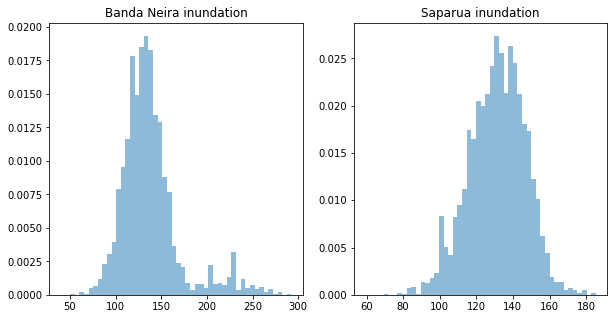

In [27]:
%matplotlib inline
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(all_model_output['Banda Neira inundation'],bins=50,alpha=0.5,density=True,label='Banda Neira inundation');
plt.title('Banda Neira inundation')
Banda_inundation = stats.norm(loc=185,scale=65)

plt.subplot(1,2,2)
plt.hist(all_model_output['Saparua inundation'],bins=50,alpha=0.5,density=True,label='Saparua inundation');
plt.title('Saparua inundation')
Saparua_inundation = stats.norm(loc=125,scale=40)


## Model Parameter Plots

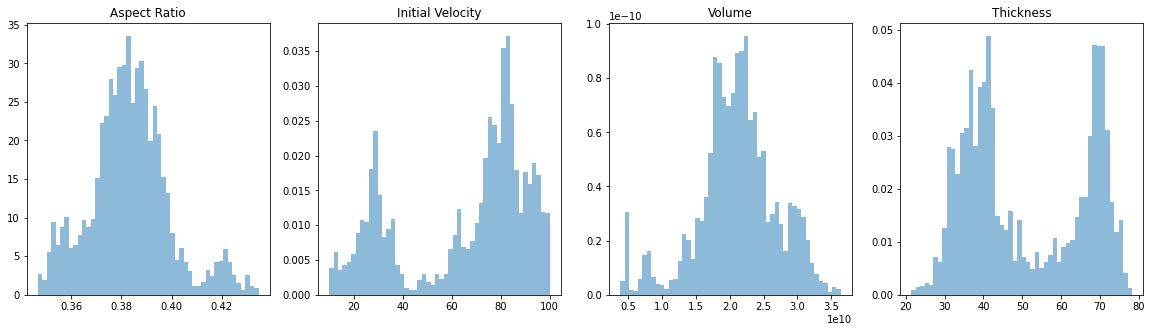

In [12]:
%matplotlib inline
plt.subplots(figsize=(20,5))
plt.subplot(1,4,1)
plt.hist(all_model_params['aspect_ratio'],bins=50,alpha=0.5,density=True,label='Aspect Ratio');
plt.title('Aspect Ratio')
plt.subplot(1,4,2)
plt.hist(all_model_params['initial_velocity'],bins=50,alpha=0.5,density=True,label='Aspect Ratio');
plt.title('Initial Velocity')
plt.subplot(1,4,3)
plt.hist(all_model_params['volume'],bins=50,alpha=0.5,density=True,label='Volume');
plt.title('Volume')
plt.subplot(1,4,4)
plt.hist(all_model_params['thickness'],bins=50,alpha=0.5,density=True,label='thickness');
plt.title('Thickness');

<ipython-input-30-cdc8fd0061ef>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


Text(0.5, 0.98, 'Kernel 3: Parameter Movement')

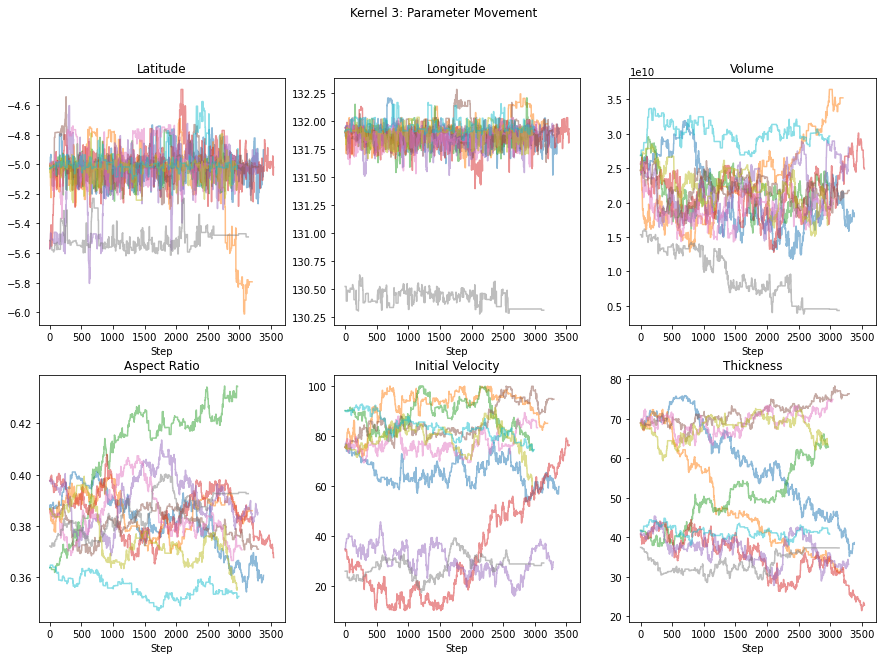

In [30]:
%matplotlib inline
plt.subplots(figsize = (15,10))
plt.subplot(2,3,1)
for slurm_id, chain in chains_debug.items():
    chain['latitude'].plot(alpha=0.5)
    plt.title('Latitude')
    plt.xlabel('Step')
plt.subplot(2,3,2)
for slurm_id, chain in chains_debug.items():
    chain['longitude'].plot(alpha=0.5)
    plt.title('Longitude')
    plt.xlabel('Step')
plt.subplot(2,3,3)
for slurm_id, chain in chains_debug.items():
    chain['volume'].plot(alpha=0.5)
    plt.title('Volume')
    plt.xlabel('Step')
plt.subplot(2,3,4)
for slurm_id, chain in chains_debug.items():
    chain['aspect_ratio'].plot(alpha=0.5)
    plt.title('Aspect Ratio')
    plt.xlabel('Step')
plt.subplot(2,3,5)
for slurm_id, chain in chains_debug.items():
    chain['initial_velocity'].plot(alpha=0.5)
    plt.title('Initial Velocity')
    plt.xlabel('Step')
plt.subplot(2,3,6)
for slurm_id, chain in chains_debug.items():
    chain['thickness'].plot(alpha=0.5)
    plt.title('Thickness')
    plt.xlabel('Step')
plt.suptitle('Kernel 3: Parameter Movement')

<ipython-input-173-8774ea6abe54>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 0.98, 'Parameter Movement')

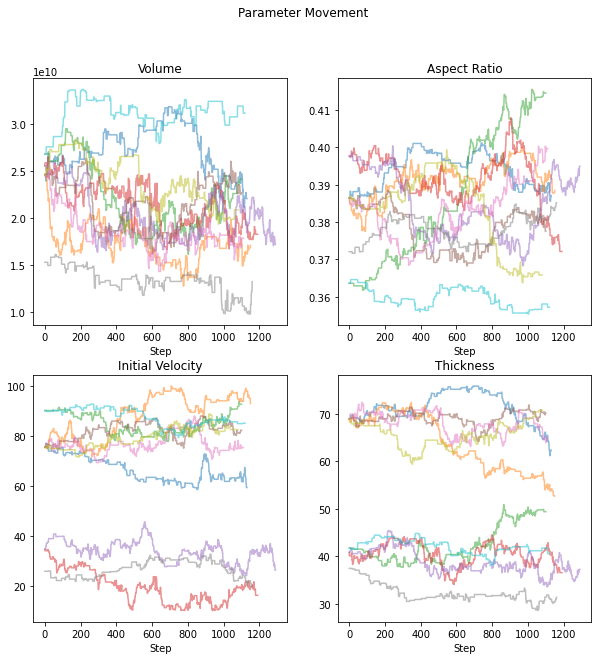

In [173]:
%matplotlib inline
plt.subplots(figsize = (10,10))
plt.subplot(2,2,1)
for slurm_id, chain in chains_debug.items():
    chain['volume'].plot(alpha=0.5)
    plt.title('Volume')
    plt.xlabel('Step')
plt.subplot(2,2,2)
for slurm_id, chain in chains_debug.items():
    chain['aspect_ratio'].plot(alpha=0.5)
    plt.title('Aspect Ratio')
    plt.xlabel('Step')
plt.subplot(2,2,3)
for slurm_id, chain in chains_debug.items():
    chain['initial_velocity'].plot(alpha=0.5)
    plt.title('Initial Velocity')
    plt.xlabel('Step')
plt.subplot(2,2,4)
for slurm_id, chain in chains_debug.items():
    chain['thickness'].plot(alpha=0.5)
    plt.title('Thickness')
    plt.xlabel('Step')
plt.suptitle('Parameter Movement')

## Acceptance Rate Plots

56292533_m8
965.0
56292546_m8
579.0
56292502_m8
705.0
56292268_m8
1179.0
56292557_m8
1126.0
56292539_m8
460.0
56292486_m8
702.0
56292451_m8
355.0
56292401_m8
563.0
56292464_m8
257.0


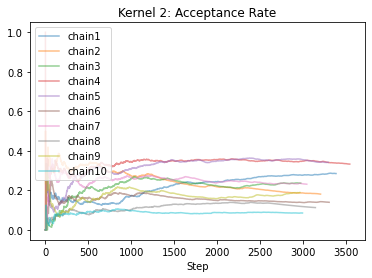

In [16]:
%matplotlib inline
plt.figure()
i = 0
for slurm_id, chain in chains_debug.items():
    print(slurm_id)
    print(np.sum(chain['accepted']))
    i+=1
    chain['acceptance_rate'].plot(alpha=0.5,label = f'chain{i}')
    plt.xlabel('Step')
    plt.legend(loc='upper left')

56292533_m8
56292546_m8
56292502_m8
56292268_m8
56292557_m8
56292539_m8
56292486_m8
56292451_m8
56292401_m8
56292464_m8


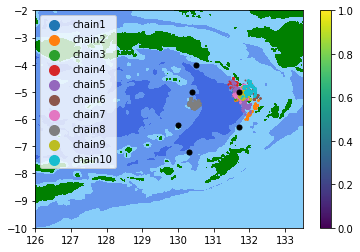

In [11]:
%matplotlib inline
plt.contourf(topo_file.X, topo_file.Y, topo_file.Z,cmap=cmap1)
i = 0
for slurm_id, chain in chains_debug.items():
    print(slurm_id)
    i+=1
    plt.scatter(chains_samples[slurm_id]['longitude'], chains_samples[slurm_id]['latitude'],s=1,
            label=f'chain{i}')
plt.plot(131.7,-6.3,'ko',markersize = 5)
plt.plot(131.7,-5,'ko',markersize = 5)
plt.plot(130,-6.2,'ko',markersize = 5)
plt.plot(130.5,-4,'ko',markersize = 5) #(reduced volume)
plt.plot(130.4,-5,'ko',markersize = 5) #(reduced velocity)
plt.plot(130.3,-7.2,'ko',markersize = 5)
plt.legend(markerscale = 10)
plt.colorbar()

In [13]:
obs_loc = np.array([[129.775, -4.5175], # Pulu Ai
           [128.178, -3.691], # Ambon
           [129.8965, -4.5248], # Banda Neira
           [127.113, -3.3815], # Buru
           [128.557, -3.543], # Hulaliu
           [128.657, -3.576], # Saparua
           [128.562, -3.501], # Kulur
           [128.807, -3.6455], # Ameth
           [128.921, -3.338]]) # Amahai
obs_names = ['Pulu Ai','Ambon','Banda Neira','Buru','Hulaliu','Saparua','Kulur','Ameth','Amahai']

In [14]:
name_loc = obs_loc.copy()
name_loc[0] = (name_loc[0,0]-.5,name_loc[0,1]-.15)
name_loc[1] = (name_loc[1,0]-.5,name_loc[1,1]-.2)
name_loc[2] = (name_loc[2,0]+.05,name_loc[2,1]+.05)
name_loc[3] = (name_loc[3,0]+.05,name_loc[3,1]+.05)
name_loc[4] = (128.25,-4.1)
name_loc[5] = (name_loc[5,0]+.05,name_loc[5,1])
name_loc[-1] = (name_loc[-1,0]+.07,name_loc[-1,1]+.07)
name_loc[-2] = (name_loc[-2,0],name_loc[-2,1]-.15)
name_loc[-3] = (name_loc[-3,0]-.4,name_loc[-3,1])
name_loc[4] = (128.25,-4.1)

Text(0.5, 1.0, 'Posterior Logpdf')

/Users/raelynnwonnacott/miniforge3/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


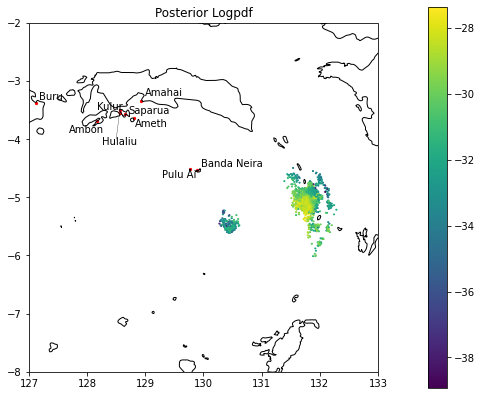

In [15]:
%matplotlib inline
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(7.5,7))
ax = plt.axes(projection=crs)
ax.set_extent((127,133,-8,-2))
ax.coastlines(resolution='10m')
plt.xticks(np.arange(127,134))
plt.yticks(np.arange(-8,-1))
# plt.hist2d(all_samples['longitude'],all_samples['latitude'],cmap='Blues',bins=20,range=[[127,133],[-8,-2]])
plt.hexbin(all_samples['longitude'],all_samples['latitude'],
           C=all_bayes_data['llh'],
           reduce_C_function=np.mean,
           cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.12)

plt.scatter(obs_loc[:,0],obs_loc[:,1],s=5,c='r')
for loc,name in zip(name_loc,obs_names):
    plt.annotate(name,loc+.01)
plt.plot(np.linspace(128.5,obs_loc[4,0],100),np.linspace(-4,obs_loc[4,1],100),color='k',linewidth=.3)
plt.title("Posterior Logpdf")


56292533_m8
56292546_m8
56292502_m8
56292268_m8
56292557_m8
56292539_m8
56292486_m8
56292451_m8
56292401_m8
56292464_m8


Text(0.5, 1.0, 'Individual Chains')

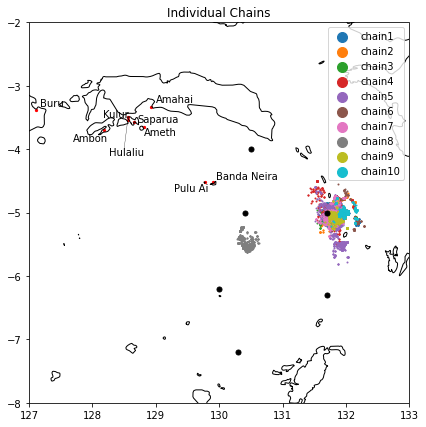

In [17]:
%matplotlib inline
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(7.5,7))
ax = plt.axes(projection=crs)
ax.set_extent((127,133,-8,-2))
ax.coastlines(resolution='10m')
plt.xticks(np.arange(127,134))
plt.yticks(np.arange(-8,-1))

i = 0
for slurm_id, chain in chains_debug.items():
    print(slurm_id)
#     plt.scatter(chains_samples[slurm_id]['longitude'], chains_samples[slurm_id]['latitude'],s=1,
#              label=slurm_id)
    i+=1
    plt.scatter(chains_samples[slurm_id]['longitude'], chains_samples[slurm_id]['latitude'],s=1,
            label=f'chain{i}')
plt.plot(131.7,-6.3,'ko',markersize = 5)
plt.plot(131.7,-5,'ko',markersize = 5)
plt.plot(130,-6.2,'ko',markersize = 5)
plt.plot(130.5,-4,'ko',markersize = 5) #(reduced volume)
plt.plot(130.4,-5,'ko',markersize = 5) #(reduced velocity)
plt.plot(130.3,-7.2,'ko',markersize = 5)
plt.legend(markerscale = 10)

plt.scatter(obs_loc[:,0],obs_loc[:,1],s=5,c='r')
for loc,name in zip(name_loc,obs_names):
    plt.annotate(name,loc+.01)
plt.plot(np.linspace(128.5,obs_loc[4,0],100),np.linspace(-4,obs_loc[4,1],100),color='k',linewidth=.3)
plt.title('Individual Chains')

Text(0.5, 1.0, 'Unnormalized Posterior Logpdf')

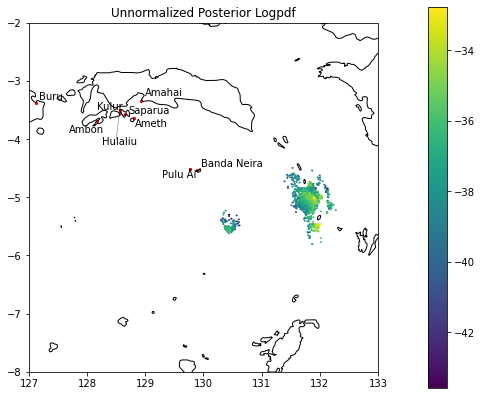

In [214]:
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(7.5,7))
ax = plt.axes(projection=crs)
ax.set_extent((127,133,-8,-2))
ax.coastlines(resolution='10m')
plt.xticks(np.arange(127,134))
plt.yticks(np.arange(-8,-1))
plt.hexbin(all_samples['longitude'],all_samples['latitude'],
           C=all_bayes_data['posterior_logpdf'],
           reduce_C_function=np.mean,
           cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.12)


plt.scatter(obs_loc[:,0],obs_loc[:,1],s=5,c='r')
for loc,name in zip(name_loc,obs_names):
    plt.annotate(name,loc+.01)
plt.plot(np.linspace(128.5,obs_loc[4,0],100),np.linspace(-4,obs_loc[4,1],100),color='k',linewidth=.3)
plt.title("Unnormalized Posterior Logpdf")


Text(0.5, 1.0, 'Posterior Logpdf')

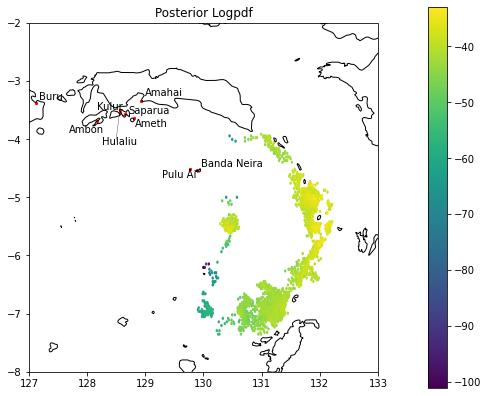

In [152]:
%matplotlib inline
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(7.5,7))
ax = plt.axes(projection=crs)
ax.set_extent((127,133,-8,-2))
ax.coastlines(resolution='10m')
plt.xticks(np.arange(127,134))
plt.yticks(np.arange(-8,-1))
# plt.hist2d(all_samples['longitude'],all_samples['latitude'],cmap='Blues',bins=20,range=[[127,133],[-8,-2]])
plt.hexbin(all_samples['longitude'],all_samples['latitude'],
           C=all_bayes_data['posterior_logpdf'],
           reduce_C_function=np.mean,
           cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.12)

plt.scatter(obs_loc[:,0],obs_loc[:,1],s=5,c='r')
for loc,name in zip(name_loc,obs_names):
    plt.annotate(name,loc+.01)
plt.plot(np.linspace(128.5,obs_loc[4,0],100),np.linspace(-4,obs_loc[4,1],100),color='k',linewidth=.3)
plt.title("Posterior Logpdf")
